In [8]:
## Homework Set #2
## Nonlinear Dynamics & Chaos -- Spring 2021
## Abhiram Kakuturu
# Full source is available at https://github.com/abhivk23/nonlinear-dynamics
import hw2
from matplotlib import pyplot as plt
import numpy as np

# LOGISTIC MAP
## Superattractors
First, we quickly determine the fixed points of the logistic map $F(x)=cx(1-x) \space \forall \space c : (1,3]$:
$$
x^* = cx^*(1-x^*)
\implies c(x^*)^2 = x^*(c-1)
\implies x^* = 0, \frac{c-1}{c}
$$
**(a)** Analytically, we predict a fixed point to be a *superattractor* or *superstable* when $F`(x^*)=c(1-2x^*)=0$. Since the only fixed point that satisfies this condition is $x^*=\frac{1}{2}$, we expect a superattractor at 0.5 for c=2. If we compare the convergence of errors for c=2 and c=3, this is exactly the behavior we get.

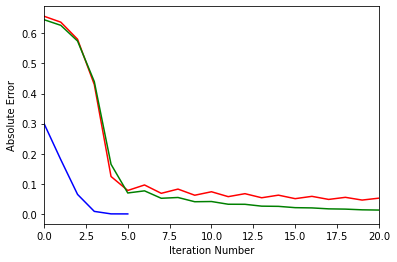

In [4]:
# Generate mapping trajectories and associated errors for c=2,3
c3, c3_errors = hw2.logistic_map(3, 0.01)
c2, c2_errors = hw2.logistic_map(2, 0.2)
c29, c29_errors = hw2.logistic_map(2.9, 0.01)

# Plot the convergence of errors for c=2
x2 = np.arange(0, len(c2_errors), 1)
x3 = np.arange(0, len(c3_errors), 1)
x29 = np.arange(0, len(c29_errors), 1)
plt.plot(x2, c2_errors, 'b')
plt.plot(x3, c3_errors, 'r')
plt.plot(x29, c29_errors, 'g')

plt.xlim(0,20)
plt.xlabel("Iteration Number")
plt.ylabel("Absolute Error")
plt.show()

**(b)** The next couple plots show the different rates of convergence given different parameters c.

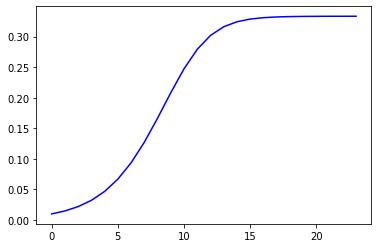

In [5]:
# 1 < c < 2 (c=1.5)
c15, c15_errors = hw2.logistic_map(1.5, 0.01)
x = np.arange(0, len(c15), 1)
plt.plot(x, c15, 'b')
plt.show()

In [6]:
def cobweb(traj, c, x_0, crit_interv):
    """
    Cobweb analysis plotter.
    """
    fig, ax = plt.subplots(1,2, figsize=(10,5))

    # F(x)
    x = np.arange(0, 1, 0.01)
    F = c*x*(1-x)
    ax[0].plot(x, F, 'r', label='F(x)')
    ax[1].plot(x, F, 'r', label='F(x)')

    # Unit Diagonal
    unit_diag = x
    ax[0].plot(x, unit_diag, 'b', label='unit diagonal')
    ax[1].plot(x, unit_diag, 'b', label='unit diagonal')

    # Iterates 
    traj.insert(0,0.)
    f_map = [val for val in traj for _ in (0, 1)] # double each value
    ax[0].plot(f_map[:-1], f_map[1:], 'g', label='cobweb')
    ax[1].plot(f_map[:-1], f_map[1:], 'g', label='cobweb')

    ax[1].set_xlim(crit_interv)
    ax[1].set_ylim(crit_interv) # zoomed in on critical region

    ax[0].set_title("c="+str(c)+" with x_0="+str(x_0))
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("F(x)=cx(1-x)")
    ax[1].set_title("(spiral behavior close-up)")
    plt.legend()

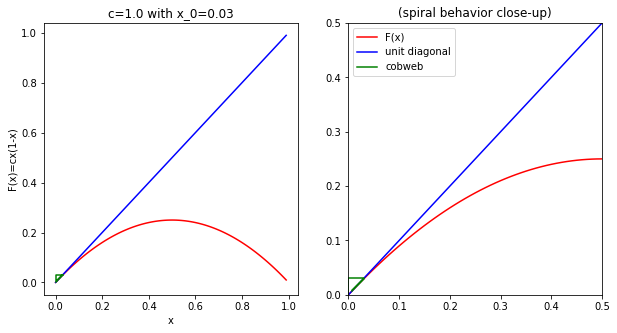

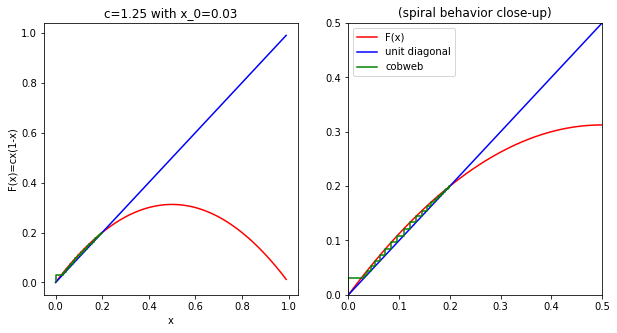

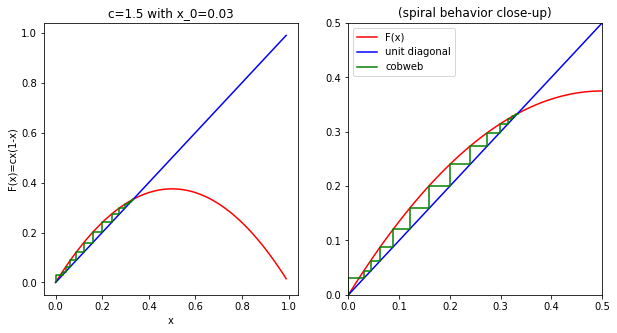

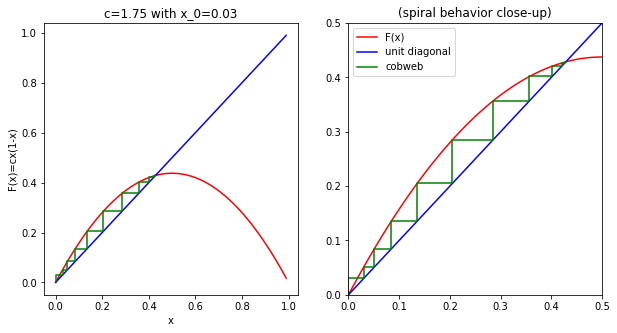

In [7]:
# 1 < c < 2
x_0 = 0.03
for c in np.arange(1,2,0.25):
    traj, traj_errors = hw2.logistic_map(c, x_0, n=100)
    cobweb(traj,c,x_0, [0.,0.5])

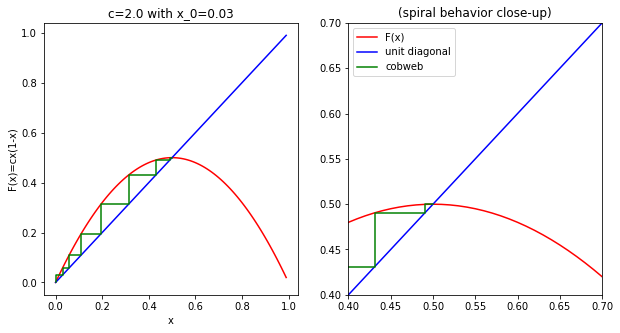

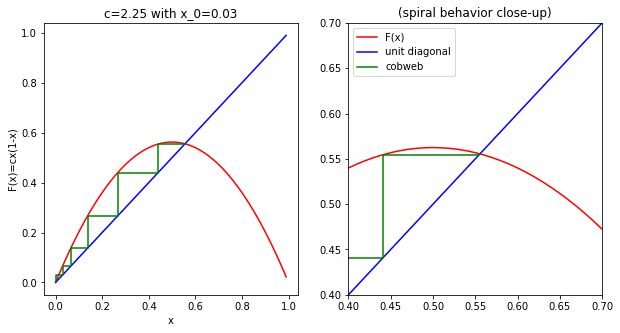

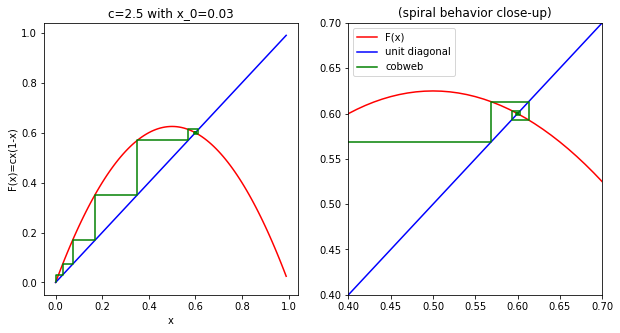

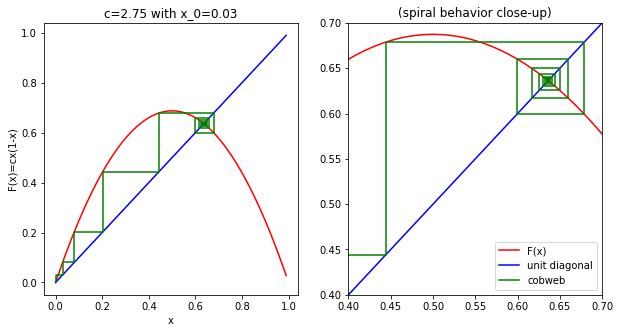

In [8]:
# 2 < c < 3
x_0 = 0.03
for c in np.arange(2,3,0.25):
    traj, traj_errors = hw2.logistic_map(c, x_0, n=100)
    cobweb(traj,c,x_0, [0.4,0.7])

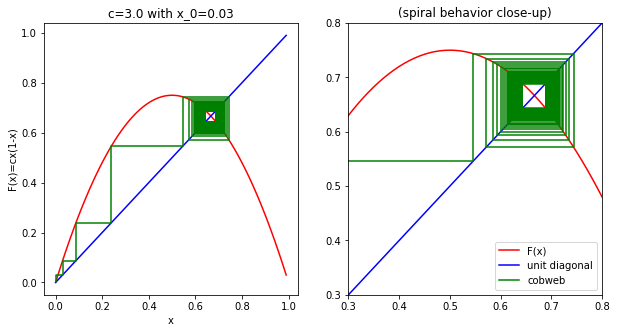

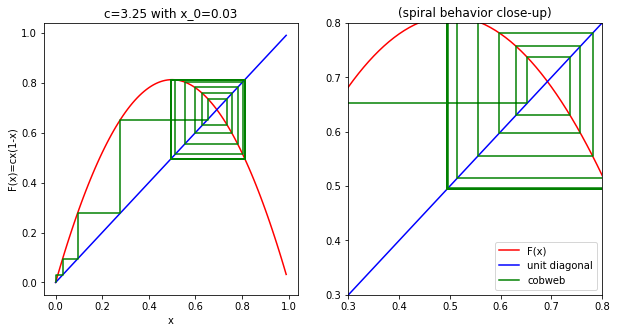

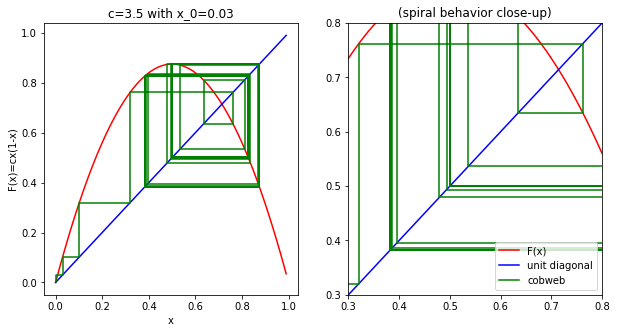

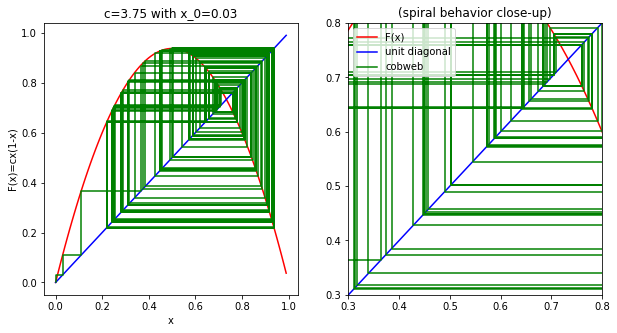

In [9]:
# c >= 3
x_0 = 0.03
for c in np.arange(3,4,0.25):
    traj, traj_errors = hw2.logistic_map(c, x_0, n=100)
    cobweb(traj,c,x_0, [0.3,0.8])

**(c)** To see that the domain of attraction is the entire state space $S \in [0,1]$, we need only plot the unit diagonal and the logistic function. Since the unit diagonal is greater than the entire range of the state space of the logsitic map for $c \in [0,1]$, all of S is the domain of attraction.

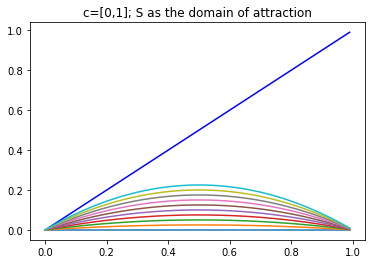

In [17]:
# Plot state space attraction
x = np.arange(0, 1, 0.01)
y = x
plt.plot(x,y,'b')

for c in np.arange(0, 1, 0.1):
    y2 = c*x*(1-x)
    plt.plot(x,y2)
plt.title("c=[0,1]; S as the domain of attraction")
plt.show()

# LOGISTIC 2-CYCLE
**(a)** The last 50 iterations of the map of c=3 (below) reveal a stable 2-cycle between the points 0.67 and 0.66. Going from a convergence on a single value, the attractor of the configuration,when c=3 to convergence on a 2-cycle indicates a period doubling bifurcation. 

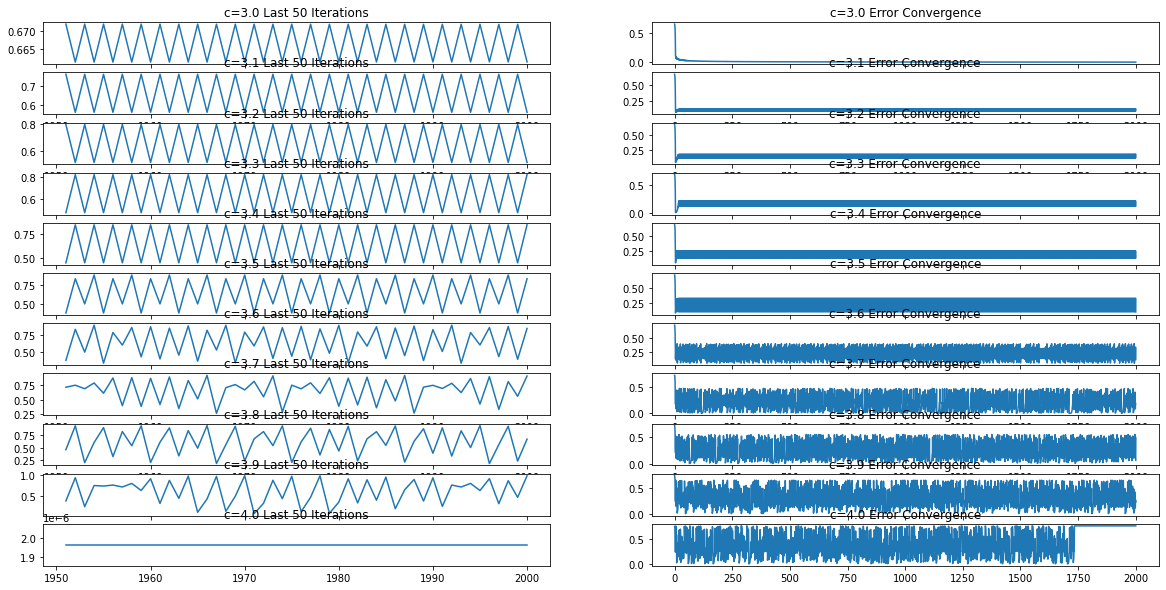

In [11]:
import pandas as pd
# Last 50 iterations of the map of c=3 (of 1000 iterations)
fig, ax = plt.subplots(11,2, figsize=(20,10))
df = pd.DataFrame()

for i in range(0,11):
    fx, fx_errors = hw2.logistic_map(3+(i/10.),0.01, n=2000)
    if (len(fx)!=2000):
        fx = fx + [fx[-1]]*(2001-len(fx))
        fx_errors = fx_errors + [fx_errors[-1]]*(2001-len(fx_errors))
    df["c="+str(3+(i/10.))+"_iter"]=fx
    df["c="+str(3+(i/10.))+"_errors"]=fx_errors

    x = np.arange(0, len(fx), 1)
    ax[i,0].plot(x[-50:], fx[-50:])
    ax[i,1].plot(x, fx_errors)

    ax[i,0].set_title("c="+str(3+(i/10.))+" Last 50 Iterations")
    ax[i,1].set_title("c="+str(3+(i/10.))+" Error Convergence")
plt.show()
df_errors = df.filter(regex='errors$', axis=1)
df_iter = df.filter(regex='iter$', axis=1)

**(b)** Plotting the error convergence on the interval $c: [3.0, 4.0]$ reveals the apparent lack of exponentially quick convergence that we observed with the Babylonian algorithm or even c=2. The table "df_errors" confirms the qualitatively consistent convergence of errors which invalidates the existence of a *superattractor* in the interval. Of course, we shouldn't expect a superattractor given that we know that for $c>3$ we will see stable m-cycles appear and therefore will not experience rapid convergence to a single value but rather an oscillation around one.

**(c)** No, once we observe a m-cycle we will not find a single point convergence. 

# LOGISTIC 3-CYCLE
We qualitatively understand the superstable 3-cycle behavior by plotting the orbit diagram of the logisitic. The below plot sequentially iterates over the interval $c : [3,4]$ and plots the convergent values and plots the convergent value for the given c. 

In the region $c : [3.0, ~3.45]$ we observe the 2-cycle, after which the map experiences period doubling and bifurcates into a 4-cycle. Period doubling continues until we hit "windows" where even-numbered cycles break down to odd-numberered cycles. The first obvious one is around c=~3.85.

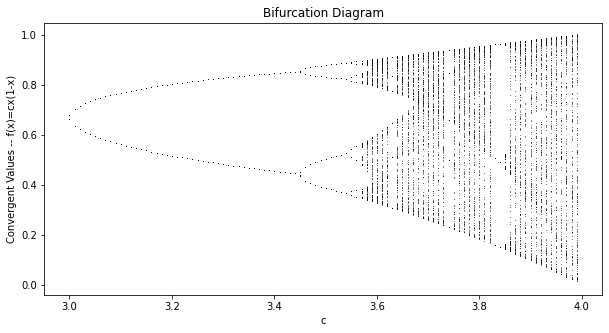

In [15]:
# Orbit map
plt.figure(figsize=(10,5))
plt.title("Bifurcation Diagram")
plt.xlabel("c")
plt.ylabel("Convergent Values -- f(x)=cx(1-x)")
for c in np.arange(3.,4.,0.01):
    orbit, orbit_errors = hw2.logistic_map(c,0.01,1000)
    for x in range(800,1000):
        plt.plot(c, orbit[x], ',k', alpha=.5)
plt.show()

# MODULO MAP
$$
x_{r+1}=2x_r\mod 1
$$
**(a)** The above modulo map can be considered a shift map when we decompose x_r as its binary sequence such that:
$$
x_r = \sum_{i=1}^{\infty}a_i 2^{-i} \implies \textbf{a} = (a_0,a_1,...)
$$ 
Thus, each successive iteration of the map removes the leading digit and shifts the remaining sequence **a** one binary digit to the left.

In [6]:
mod = hw2.modulo_map(4.8)
mod[:10]

[4.8,
 0.5999999999999996,
 0.1999999999999993,
 0.3999999999999986,
 0.7999999999999972,
 0.5999999999999943,
 0.19999999999998863,
 0.39999999999997726,
 0.7999999999999545,
 0.599999999999909]